In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
print(tf.__version__)
# 20231225 應該是當初安裝時程式有異，所以keras沒抓到tensorflow預設的版本
# 20240104 tf2.10 / tf2.12 version can run
# 20240205 tf2.15 version can not run
tf_version = tf.__version__

pos = tf_version.index('.')
pos = tf_version.index('.', pos+1)
tf_version = tf_version[0:pos]
#print(tf_version)

if float(tf_version) < 2.14 :
    print(keras.__version__) #-- import keras 可用；tensorflow.keras 沒有這個函式
else :
    print("no method")

2.10.0
2.10.0


In [3]:
# Test tensorflow-gpu method 1
if tf.test.gpu_device_name() :
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else :
    print("Please install GPUversion of TF")

#tf.test.is_gpu_available() # 該函式在本版本已被棄用
tf.config.list_physical_devices('GPU')


Please install GPUversion of TF


[]

In [4]:
# Listing 6.1 Word-level one-hot encoding (toy example)
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {} # 宣告一個字典變數
for sample in samples:
    print("sample= ", sample)
    for word in sample.split():
        print("word= ", word)
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10
"""
numpy zeros() :
shape：定義傳回陣列的形狀
dtype：產生矩陣的資料型，可選參數，預設為numpy.float64
order：{'C'，'F'}，可選，預設：'C'，是否在內容中以行（C）或列（F）順序儲存多維資料。
"""
results = np.zeros(shape=(len(samples), 
                          max_length, 
                          max(token_index.values()) + 1))

print(results.shape)
print(results)
print(token_index)
print(type(token_index))

sample=  The cat sat on the mat.
word=  The
word=  cat
word=  sat
word=  on
word=  the
word=  mat.
sample=  The dog ate my homework.
word=  The
word=  dog
word=  ate
word=  my
word=  homework.
(2, 10, 11)
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, '

In [5]:
# Listing 6.1 Word-level one-hot encoding (toy example) -- continue ...
for i, sample in enumerate(samples):
#    print("i, sample =", i, sample)
    for j, word in list(enumerate(sample.split()))[:max_length]:
#        print("j, word =", j, word)
        index = token_index.get(word)
#        print("index =", index)
        results[i, j, index] = 1.
#        print(results[i, j, index])

print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [6]:
# Test enumerate() usage
"""
for i, sample in enumerate(samples):
    print(sample)
#    for j, word in list(enumerate(sample.split()))[:max_length]:
    print(list(enumerate(sample.split())))
    for j, word in list(enumerate(sample.split()))[:max_length] :
#        print("j, word =", j, word)
        print(word)
    print("\n=== next sentence ===\n")
"""
    
str = "The cat sat on the mat."
print(list(str.split()))
for i, word in enumerate(list(str.split())) :
    print(i, word)
    

['The', 'cat', 'sat', 'on', 'the', 'mat.']
0 The
1 cat
2 sat
3 on
4 the
5 mat.


In [7]:
# Listing 6.2 Character-level one-hot encoding (toy example)
# one-hot編碼，逐字元
import string
np.set_printoptions(threshold=100000)

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# string.printable
# value : 「0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$ ...」
# 由被視為可打印符號的ASCII字符組成的字符串。
# 這是digits, ascii_letters, punctuation 和 whitespace 的總和。
characters = string.printable
#print("characters orders : ", characters)

# 20240205 Notes
# dict d = {key1 : value1, key2 : value2, ...} 
# zip(X, Y) => [(x1, y1), (x2, y2), ...]
# 20240121 這一行應該寫錯, ref dlwp_ch06_test.ipynb
#          output : character= T index=  None i=  0 ,j=  0
#token_index = dict(zip(range(1, len(characters) + 1), characters))
"""
{1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 
11: 'a', 12: 'b', 13: 'c', 14: 'd', 15: 'e', 16: 'f', 17: 'g', 18: 'h', 19: 'i', 20: 'j', 
21: 'k', 22: 'l', 23: 'm', 24: 'n', 25: 'o', 26: 'p', 27: 'q', 28: 'r', 29: 's', 30: 't', 
31: 'u', 32: 'v', 33: 'w', 34: 'x', 35: 'y', 36: 'z', 37: 'A', 38: 'B', 39: 'C', 40: 'D', 
41: 'E', 42: 'F', 43: 'G', 44: 'H', 45: 'I', 46: 'J', 47: 'K', 48: 'L', 49: 'M', 50: 'N', 
51: 'O', 52: 'P', 53: 'Q', 54: 'R', 55: 'S', 56: 'T', 57: 'U', 58: 'V', 59: 'W', 60: 'X', 
61: 'Y', 62: 'Z', 63: '!', 64: '"', 65: '#', 66: '$', 67: '%', 68: '&', 69: "'", 70: '(', 
71: ')', 72: '*', 73: '+', 74: ',', 75: '-', 76: '.', 77: '/', 78: ':', 79: ';', 80: '<', 
81: '=', 82: '>', 83: '?', 84: '@', 85: '[', 86: '\\', 87: ']', 88: '^', 89: '_', 90: '`', 
91: '{', 92: '|', 93: '}', 94: '~', 95: ' ', 96: '\t', 97: '\n', 98: '\r', 99: '\x0b', 100: '\x0c'}
"""

token_index = dict(zip(characters, range(1, len(characters) + 1)))
"""
output :
{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 
11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 
21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 
31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 
41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 
51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 
61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 
71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 
81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 
91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}
"""

#print(token_index)
#print(token_index.get(5))

max_length = 50
print("== init results ==")
results = np.zeros((len(samples), max_length, len(token_index) + 1)) # 初始化陣列值均為 0
#print(results)
print("results object type : ", results.shape)

print("== middle line ==")

for i, sample in enumerate(samples):
#    print("First loop : i, sample =", i, sample) # output --> First loop : i, sample = 0 The cat sat on the mat.
    for j, character in enumerate(sample):
#        print("Second Loop : j, character =", j, character)
        """
        output : 
          Second Loop : j, character = 0 T
          Second Loop : j, character = 1 h
          ...
        """
        index = token_index.get(character)
#        print("character=", character, ", index= ", index, ", i= ", i, ", j= ", j)
        results[i, j, index] = 1. # index == None, 整個陣列的值會被填入 1

print("== end line ==")
#print(results.shape)
print(results)


== init results ==
results object type :  (2, 50, 101)
== middle line ==
== end line ==
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [8]:
# Test None
np.set_printoptions(threshold=100000)

arr = np.zeros(shape=(2,3,5))
print(type(arr))
i = 1
j = 1
k = None
#k = 1
arr[i, j, k] = 1.
print(arr)

<class 'numpy.ndarray'>
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]
  [0. 0. 0. 0. 0.]]]


In [9]:
np.set_printoptions(threshold=np.inf)

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
#token_index = dict(zip(range(1, len(characters) + 1), characters))
print(list(enumerate(samples)))

#print(token_index)
#print(results.shape)
#print(results)


[(0, 'The cat sat on the mat.'), (1, 'The dog ate my homework.')]


In [10]:
# Listing 6.3 Using Keras for word-level one-hot encoding
# 自然語言處理的領域，tokenization 一般會翻譯做分詞，而 tokenizer 一般會翻譯成分詞器。
"""
https://ithelp.ithome.com.tw/articles/10291737?sc=rss.iron
要教會機器人語言首先我們要寫一本辭典，也就是建立詞彙庫，同樣使用TensorFlow提供的keras中的功能，
我們可輸入一些句子，然後根據句子中的單字創造詞彙庫

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
https://github.com/keras-team/keras/blob/v2.15.0/keras/preprocessing/text.py#L329-L343
tokenizer 說明 : 
  http://codewithzhangyi.com/2019/04/23/keras-tokenizer/ 
  https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
"""
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index # 找回單詞索引

print('Found %s unique tokens.' % len(word_index))
print(word_index)

#print(tokenizer)

# 轉換成機器人語
print(sequences)

"""
https://blog.droidtown.co/post/188695881747/articutnlp03
在語言學的領域裡，語言從最小的「音素」>「音節」>「詞素」>「詞彙」>「詞組」>「句子」>「句組」>「篇章」都是有嚴格的操作定義的。
但在 NLP 裡，因為電腦並不知道什麼是音素，更別說理解什麼是詞彙、句子…一類的定義，它只知道「把某些符號擺在一起，然後存入一個記憶體位置。」
這樣的操作而已。因此，我們使用 “token” 這個字眼，來表示「某些對人類而言有意義的符號順序」。
"""

Found 9 unique tokens.
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}
[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]


'\nhttps://blog.droidtown.co/post/188695881747/articutnlp03\n在語言學的領域裡，語言從最小的「音素」>「音節」>「詞素」>「詞彙」>「詞組」>「句子」>「句組」>「篇章」都是有嚴格的操作定義的。\n但在 NLP 裡，因為電腦並不知道什麼是音素，更別說理解什麼是詞彙、句子…一類的定義，它只知道「把某些符號擺在一起，然後存入一個記憶體位置。」\n這樣的操作而已。因此，我們使用 “token” 這個字眼，來表示「某些對人類而言有意義的符號順序」。\n'

In [11]:
# Tokenizer 入門 ( https://ithelp.ithome.com.tw/articles/10298516 )

# Character tokenization
string = "Only those who will risk going too far can possibly find out how far one can go."
tokenized_str = list(string)
print("tokenized_str =", tokenized_str)

print(sorted(set(tokenized_str)))
# numericalization
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_str)))}
print("token2idx =", token2idx)

# 把原始的句子，根據上面這個 set，轉換為數字
input_ids = [token2idx[token] for token in tokenized_str]
print("input_ids =", input_ids)


tokenized_str = ['O', 'n', 'l', 'y', ' ', 't', 'h', 'o', 's', 'e', ' ', 'w', 'h', 'o', ' ', 'w', 'i', 'l', 'l', ' ', 'r', 'i', 's', 'k', ' ', 'g', 'o', 'i', 'n', 'g', ' ', 't', 'o', 'o', ' ', 'f', 'a', 'r', ' ', 'c', 'a', 'n', ' ', 'p', 'o', 's', 's', 'i', 'b', 'l', 'y', ' ', 'f', 'i', 'n', 'd', ' ', 'o', 'u', 't', ' ', 'h', 'o', 'w', ' ', 'f', 'a', 'r', ' ', 'o', 'n', 'e', ' ', 'c', 'a', 'n', ' ', 'g', 'o', '.']
[' ', '.', 'O', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'n', 'o', 'p', 'r', 's', 't', 'u', 'w', 'y']
token2idx = {' ': 0, '.': 1, 'O': 2, 'a': 3, 'b': 4, 'c': 5, 'd': 6, 'e': 7, 'f': 8, 'g': 9, 'h': 10, 'i': 11, 'k': 12, 'l': 13, 'n': 14, 'o': 15, 'p': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'w': 21, 'y': 22}
input_ids = [2, 14, 13, 22, 0, 19, 10, 15, 18, 7, 0, 21, 10, 15, 0, 21, 11, 13, 13, 0, 17, 11, 18, 12, 0, 9, 15, 11, 14, 9, 0, 19, 15, 15, 0, 8, 3, 17, 0, 5, 3, 14, 0, 16, 15, 18, 18, 11, 4, 13, 22, 0, 8, 11, 14, 6, 0, 15, 20, 19, 0, 10, 15, 21, 0, 8, 3, 17

In [12]:
# Word tokenization
string = "Only those who will risk going too far can possibly find out how far one can go."
tokenized_str = string.split()
print("tokenized_str= ", tokenized_str)

# numericalization
token_word2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_str)))} # 字典
print("token_word2idx= ", token_word2idx)

# mapping 回 set
input_ids = [token_word2idx[token] for token in tokenized_str]
print("input_ids= ", input_ids)

"""
enumerate() 函數用於將一個可遍歷的數據對象(如列表、元組或字符串)組合為一個索引序列，同時列出數據和數據下標，一般用在 for 循環當中。
syntax : enumerate(sequence, [start=0])
         sequence : 一個序列、迭代器或其他支持迭代對象。
         start    : 下標起始位置的值。

[set Memo]
Python set 集合初始化元素使用 {} 來包住元素，也可以帶入 set() 建構子，但若要建立空的 set 要使用 set()，
使用 s = {} 是會建立空 dict，不要搞錯囉！
Python 官方文件寫明 set 物件是無序，即使你印出來時發現是按照順序的，所以在使用 set 時請記得不保證有序的，
另外 set 裡是不會包含重複的元素。
"""

tokenized_str=  ['Only', 'those', 'who', 'will', 'risk', 'going', 'too', 'far', 'can', 'possibly', 'find', 'out', 'how', 'far', 'one', 'can', 'go.']
token_word2idx=  {'Only': 0, 'can': 1, 'far': 2, 'find': 3, 'go.': 4, 'going': 5, 'how': 6, 'one': 7, 'out': 8, 'possibly': 9, 'risk': 10, 'those': 11, 'too': 12, 'who': 13, 'will': 14}
input_ids=  [0, 11, 13, 14, 10, 5, 12, 2, 1, 9, 3, 8, 6, 2, 7, 1, 4]


'\nenumerate() 函數用於將一個可遍歷的數據對象(如列表、元組或字符串)組合為一個索引序列，同時列出數據和數據下標，一般用在 for 循環當中。\nsyntax : enumerate(sequence, [start=0])\n         sequence : 一個序列、迭代器或其他支持迭代對象。\n         start    : 下標起始位置的值。\n\n[set Memo]\nPython set 集合初始化元素使用 {} 來包住元素，也可以帶入 set() 建構子，但若要建立空的 set 要使用 set()，\n使用 s = {} 是會建立空 dict，不要搞錯囉！\nPython 官方文件寫明 set 物件是無序，即使你印出來時發現是按照順序的，所以在使用 set 時請記得不保證有序的，\n另外 set 裡是不會包含重複的元素。\n'

In [13]:
# Listing 6.4 Word-level one-hot encoding with hashing trick (toy example)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))

print(list(enumerate(samples)))
print(list(enumerate(sample.split())))

# 使用hash function計算位置
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

#print(results.shape)
print(results[0:1:1])

[(0, 'The cat sat on the mat.'), (1, 'The dog ate my homework.')]
[(0, 'The'), (1, 'dog'), (2, 'ate'), (3, 'my'), (4, 'homework.')]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0

In [14]:
# Listing 6.5 Instantiating an Embedding layer
# ref: https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
#      https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding
from keras.layers import Embedding

# input_dim = 1000 ; outpu_dim = 64
embedding_layer = Embedding(1000, 64)
print(type(embedding_layer))

# 20240210 How to get embedding's shape ??
# print(embedding_layer.shape())

"""
[Embedding Memo]
https://blog.csdn.net/songyunli1111/article/details/85100616
Embedding字面理解是"嵌入"，實質是一種映射，從語義空間到向量空間的映射，
同時儘可能在向量空間保持原樣本在語義空間的關係，如語義接近的兩個詞彙在向
量空間中的位置也比較接近。

https://qiankunli.github.io/2022/03/02/embedding.html
Embedding 的过程，就是把数据集合映射到向量空间，进而把数据进行向量化的过程。
Embedding 的目标，就是找到一组合适的向量，来刻画现有的数据集合。

[word embedding]
https://blog.csdn.net/qq_41562704/article/details/102662272
深度學習模只能處理數值型張量，因此需要將文本轉換為數值張量，即文本向量化。
將文本分解成標記token(單詞、字符或n-gram)，將標該與向量關聯的方法
常用的one-hot編碼和詞嵌入(word embedding)。

現在詞嵌入，每個維度表示一定含義，語義相似的詞的嵌入就相近。
最開始時，詞嵌入是每個詞語有固定的詞嵌入，但對一詞多譯的情況並不合理。
目前基本都是每個token一個嵌入。

詞嵌入的作用是將人類語言映射到幾何空間，利用詞向量之間的幾何關係表示這些詞間的語義關係。

可以將一個embedding層理解為字典，接受整數做為輸入，返回相關聯的向量。(單詞索引-->對應的詞向量)
在訓練過程中，embedding的權重最開始是隨機的。訓練過程中，利用反向傳播逐漸調節這些詞向量。
"""

<class 'keras.layers.core.embedding.Embedding'>


'\n[Embedding Memo]\nhttps://blog.csdn.net/songyunli1111/article/details/85100616\nEmbedding字面理解是"嵌入"，實質是一種映射，從語義空間到向量空間的映射，\n同時儘可能在向量空間保持原樣本在語義空間的關係，如語義接近的兩個詞彙在向\n量空間中的位置也比較接近。\n\nhttps://qiankunli.github.io/2022/03/02/embedding.html\nEmbedding 的过程，就是把数据集合映射到向量空间，进而把数据进行向量化的过程。\nEmbedding 的目标，就是找到一组合适的向量，来刻画现有的数据集合。\n\n[word embedding]\nhttps://blog.csdn.net/qq_41562704/article/details/102662272\n深度學習模只能處理數值型張量，因此需要將文本轉換為數值張量，即文本向量化。\n將文本分解成標記token(單詞、字符或n-gram)，將標該與向量關聯的方法\n常用的one-hot編碼和詞嵌入(word embedding)。\n\n現在詞嵌入，每個維度表示一定含義，語義相似的詞的嵌入就相近。\n最開始時，詞嵌入是每個詞語有固定的詞嵌入，但對一詞多譯的情況並不合理。\n目前基本都是每個token一個嵌入。\n\n詞嵌入的作用是將人類語言映射到幾何空間，利用詞向量之間的幾何關係表示這些詞間的語義關係。\n\n可以將一個embedding層理解為字典，接受整數做為輸入，返回相關聯的向量。(單詞索引-->對應的詞向量)\n在訓練過程中，embedding的權重最開始是隨機的。訓練過程中，利用反向傳播逐漸調節這些詞向量。\n'

In [15]:
# Listing 6.6 Loading the IMDB data for use with an Embedding layer
from keras.datasets import imdb
# 20240115 新版已將該函數移至它處
#from keras import preprocessing
from keras.utils import pad_sequences

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

#print(x_train[:2]) # contents to integer
#print(x_test[:2]) # contents to integer
#print(y_train[:2]) # comment , only 0 or 1

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences
#x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
#x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [16]:
# pad_sequences usage 
list_1 = [[2,3,4]]
print("list_1 : ", keras.preprocessing.sequence.pad_sequences(list_1, maxlen=10))
# array([[0, 0, 0, 0, 0, 0, 0, 2, 3, 4]], dtype=int32)

list_2 = [[1,2,3,4,5],[11,21,33,44]]
print("list_2 : ", keras.preprocessing.sequence.pad_sequences(list_2, maxlen=10))
# array([[0, 0, 0, 0, 0, 1, 2, 3, 4, 5]], dtype=int32)

"""
ref : https://www.twblogs.net/a/5c113708bd9eee5e40bb23af
keras.preprocessing.sequence.pad_sequences(sequences, 
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre', 
    value=0.)
sequences ：浮點數或整數構成的兩層嵌套列表
maxlen    ：None或整數，爲序列的最大長度。大於此長度的序列將被截短，小於此長度的序列將在後部填0.
dtype     ：返回的numpy array的數據類型
padding   ：‘pre’或‘post’，確定當需要補0時，在序列的起始還是結尾補`
truncating：‘pre’或‘post’，確定當需要截斷序列時，從起始還是結尾截斷
value     ：浮點數，此值將在填充時代替默認的填充值0
返回的是個2維張量，長度爲maxlen
"""

list_1 :  [[0 0 0 0 0 0 0 2 3 4]]
list_2 :  [[ 0  0  0  0  0  1  2  3  4  5]
 [ 0  0  0  0  0  0 11 21 33 44]]


"\nref : https://www.twblogs.net/a/5c113708bd9eee5e40bb23af\nkeras.preprocessing.sequence.pad_sequences(sequences, \n    maxlen=None,\n    dtype='int32',\n    padding='pre',\n    truncating='pre', \n    value=0.)\nsequences ：浮點數或整數構成的兩層嵌套列表\nmaxlen    ：None或整數，爲序列的最大長度。大於此長度的序列將被截短，小於此長度的序列將在後部填0.\ndtype     ：返回的numpy array的數據類型\npadding   ：‘pre’或‘post’，確定當需要補0時，在序列的起始還是結尾補`\ntruncating：‘pre’或‘post’，確定當需要截斷序列時，從起始還是結尾截斷\nvalue     ：浮點數，此值將在填充時代替默認的填充值0\n返回的是個2維張量，長度爲maxlen\n"

In [17]:
# Listing 6.6 after pad_sequences(), 只取前20個字
print(x_train[:10])

[[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
    15   16 5345   19  178   32]
 [  23    4 1690   15   16    4 1355    5   28    6   52  154  462   33
    89   78  285   16  145   95]
 [1352   13  191   79  638   89    2   14    9    8  106  607  624   35
   534    6  227    7  129  113]
 [   7 2804    5    4  559  154  888    7  726   50   26   49 7008   15
   566   30  579   21   64 2574]
 [  15  595   13  784   25 3171   18  165  170  143   19   14    5 7224
     6  226  251    7   61  113]
 [  10   10 1361  173    4  749    2   16 3804    8    4  226   65   12
    43  127   24    2   10   10]
 [  99   76   23    2    7  419  665   40   91   85  108    7    4 2084
     5 4773   81   55   52 1901]
 [ 277 1730   37   25   92  202    6 8848   44   25   28    6   22   15
   122   24 4171   72   33   32]
 [  12  639   21   13   80  140    5  135   15   14    9   31    7    4
   118 3672   13   28  126  110]
 [  78  807    9  375    8 1167    8  794   76    7    

In [18]:
# Listing 6.7 Using an Embedding layer and classifier on the IMDB data
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential() # 全連接層
model.add(Embedding(10000, 8, input_length=maxlen))
#emb = Embedding(10000, 8, input_length=maxlen)
#print(type(emb))
#model.add(emb)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2024-03-11 13:34:29.379900: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-11 13:34:29.380357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-11 13:34:29.380608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-11 13:34:29.380944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-11 13:34:29.381190: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

170/625 [=======>......................] - ETA: 0s - loss: 0.6913 - acc: 0.5373

2024-03-11 13:34:29.860227: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


625/625 [==============================] - 1s 1ms/step - loss: 0.6707 - acc: 0.6205 - val_loss: 0.6231 - val_acc: 0.6926
Epoch 2/10
625/625 [==============================] - 1s 899us/step - loss: 0.5449 - acc: 0.7542 - val_loss: 0.5288 - val_acc: 0.7252
Epoch 3/10
625/625 [==============================] - 1s 880us/step - loss: 0.4625 - acc: 0.7880 - val_loss: 0.5035 - val_acc: 0.7416
Epoch 4/10
625/625 [==============================] - 1s 868us/step - loss: 0.4210 - acc: 0.8120 - val_loss: 0.4975 - val_acc: 0.7506
Epoch 5/10
625/625 [==============================] - 1s 882us/step - loss: 0.3921 - acc: 0.8270 - val_loss: 0.4954 - val_acc: 0.7532
Epoch 6/10
625/625 [==============================] - 1s 899us/step - loss: 0.3678 - acc: 0.8407 - val_loss: 0.5011 - val_acc: 0.7558
Epoch 7/10
625/625 [==============================] - 1s 885us/step - loss: 0.3458 - acc: 0.8547 - val_loss: 0.5042 - val_acc: 0.7554
Epoch 8/10
625/625 [==============================] - 1s 928us/step - loss:

In [19]:
""" (2024.02.12 Wait 2 Finish)
REF: https://keras-cn.readthedocs.io/en/latest/layers/embedding_layer/
<<< Embedding Usage >>>
keras.layers.embeddings.Embedding(input_dim, 
                                  output_dim, 
                                  embeddings_initializer='uniform', 
                                  embeddings_regularizer=None, 
                                  activity_regularizer=None, 
                                  embeddings_constraint=None, 
                                  mask_zero=False, 
                                  input_length=None)
Parameter
    input_dim：大或等於0的整數，字典長度，即輸入數據最大下標+1
    output_dim：大於0的整數，代表全連接嵌入的維度
    embeddings_initializer: 嵌入矩陣的初始化方法，為預定義初始化方法名的字符串，或用於初始化權重的初始化器。
                            參考initializers
    embeddings_regularizer: 嵌入矩陣的正則項，為Regularizer對象
    embeddings_constraint: 嵌入矩陣的約束項，為Constraints對象
    mask_zero：布尔值，确定是否将输入中的‘0’看作是应该被忽略的‘填充’（padding）值，该参数在使用递归层处理变长输入时有用。设置为True的话，模型中后续的层必须都支持masking，否则会抛出异常。如果该值为True，则下标0在字典中不可用，input_dim应设置为|vocabulary| + 1。
    input_length：当输入序列的长度固定时，该值为其长度。如果要在该层后接Flatten层，然后接Dense层，则必须指定该参数，否则Dense层的输出维度无法自动推断。
Input Parameter
    形如 (samples，sequence_length) 的2D张量
Output Parameter
    形如 (samples, sequence_length, output_dim) 的3D张量
"""



" (2024.02.12 Wait 2 Finish)\nREF: https://keras-cn.readthedocs.io/en/latest/layers/embedding_layer/\n<<< Embedding Usage >>>\nkeras.layers.embeddings.Embedding(input_dim, \n                                  output_dim, \n                                  embeddings_initializer='uniform', \n                                  embeddings_regularizer=None, \n                                  activity_regularizer=None, \n                                  embeddings_constraint=None, \n                                  mask_zero=False, \n                                  input_length=None)\nParameter\n    input_dim：大或等於0的整數，字典長度，即輸入數據最大下標+1\n    output_dim：大於0的整數，代表全連接嵌入的維度\n    embeddings_initializer: 嵌入矩陣的初始化方法，為預定義初始化方法名的字符串，或用於初始化權重的初始化器。\n                            參考initializers\n    embeddings_regularizer: 嵌入矩陣的正則項，為Regularizer對象\n    embeddings_constraint: 嵌入矩陣的約束項，為Constraints對象\n    mask_zero：布尔值，确定是否将输入中的‘0’看作是应该被忽略的‘填充’（padding）值，该参数在使用递归层处理变长输入时有用。设置为True的话，模型中后续的层必须都支持masking，否

In [20]:
# Listing 6.8 Processing the labels of the raw IMDB data
import os
import platform

if platform.system() == "Windows" :
    imdb_dir = 'C:\\Workspaces\\Datasets\\aclImdb' 
elif platform.system() == "Linux" :
    imdb_dir = '/home/earvin/workspaces/datasets/aclImdb'
else :
    # Mac path (Not finished)
    imdb_dir = '/home/earvin/workspaces/datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            # on windows platform, 會因為編碼問題報錯，所以要加上指定編碼
#            f = open(os.path.join(dir_name, fname))
            f = open(os.path.join(dir_name, fname), encoding="utf-8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                 labels.append(1)

In [21]:
#print(labels)
print(texts[:2])
print(labels)

['A trooper is on the side of the road making sure every1 is obeying the speed limit (doing his job); he then pulls over a woman who appears she is a mother (there is a child in the back seat); he then is telling her what is wrong and BAM...they get killed. Okay, this is the start of what i personally thought would have been a good movie. When I was watching this movie in the theatre I was with some friends. This was our first night out after the summer so we wanted to go and see a good movie. We all decided to see a suspense/thriller that looked good to everyone in the group...this was one of the biggest mistakes of my life. Not only did I waste $7.oo on a movie ticket, but I had to sit through torture for the brain. This movie started off with mystery and suspense and I seriously thought "this cant be bad"...I was so wrong. The whole problem with this movie is that it makes no sense; even if you can get passed the bad acting, the "not so scary" storyline, and the over all horrible me

In [22]:
# Listing 6.9 Tokenizing the text of the raw IMDB data
from keras.preprocessing.text import Tokenizer # 分詞器；tf v2.15 keras
# 20240130 tf2.12 
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
import numpy as np

maxlen = 100               # 100個單詞後截斷評論
training_samples = 200     # 在200個樣本上訓練
validation_samples = 10000 # 在10000個樣本上驗證
max_words = 10000          # 只考慮數據集中前10000個最常見的單詞

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# 將數據劃分為訓練集和驗證集，首先要打亂數據
# 因為一開始數據中的樣本是排序好的
# (所有負面評論在前面，然後是所有正面評論)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [23]:
# Tokenizer Usage
"""
REF: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

※ Deprecated: 
   `tf.keras.preprocessing.text.Tokenizer` does not operate on tensors and is not 
   recommended for new code. 
   Prefer tf.keras.layers.TextVectorization which provides equivalent functionality 
   through a layer which accepts tf.Tensor input. See the text loading tutorial for 
   an overview of the layer and text handling in tensorflow.
    
tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
    analyzer=None,
    **kwargs
)

tokenizer = Tokenizer(num_words=max_words) # 分詞器
tokenizer.fit_on_texts(texts) # 分詞器方法：實現分詞
sequences = tokenizer.texts_to_sequences(texts) # 分詞器方法：輸出向量序列
data = pad_sequences(sequences, maxlen=maxlen) # 進行padding (（講話、文章中的）鋪張詞藻，冗詞贅句)



https://www.huaxiaozhuan.com/%E5%B7%A5%E5%85%B7/huggingface_transformer/chapters/1_tokenizer.html
Tokenizer 是 NLP pipeline 的核心组件之一。
Tokenizer 的目标是：将文本转换为模型可以处理的数据。
模型只能处理数字，因此 Tokenizer 需要将文本输入转换为数字输入。
通常而言有三种类型的 Tokenizer ：Word-based Tokenizer、Character-based Tokenizer、Subword Tokenizer 。
※ Subword Tokenizer說明：https://ithelp.ithome.com.tw/m/articles/10298638
"""
tokenizer = Tokenizer(num_words=max_words)
#dir(tokenizer)  # 顯示物件屬性
vars(tokenizer) # 返回object對象的__dict__屬性，其中object對象可以是模塊、類、實例
                 # 或任何其它有__dict__屬性的對象。
#tokenizer.__dict__
#help(tokenizer) # 說明檔
#type(tokenizer)
#hasattr(tokenizer, "num_words")
#callable(tokenizer) # <-- 回呼函數是做啥用 ?? 2024.02.13
#print(texts[:3])
#print(texts[1:3])
#len(texts[:1])


tokenizer.fit_on_texts(texts[1:3])
#print("=== After call fit_on_texts() ===")
#print(vars(tokenizer))

sequences = tokenizer.texts_to_sequences(texts[1:3]) # return list object
print(sequences)

[[24, 13, 4, 3, 55, 56, 6, 57, 58, 2, 59, 31, 60, 18, 32, 18, 61, 19, 2, 3, 62, 33, 20, 7, 4, 34, 63, 64, 5, 35, 14, 65, 7, 4, 66, 1, 67, 33, 4, 3, 68, 6, 36, 15, 1, 69, 70, 71, 8, 21, 5, 72, 25, 73, 74, 75, 76, 4, 77, 26, 78, 37, 27, 16, 79, 80, 9, 81, 8, 1, 38, 82, 1, 39, 83, 6, 1, 36, 15, 1, 38, 84, 4, 85, 86, 87, 88, 9, 3, 89, 6, 39, 90, 91, 2, 3, 21, 92, 22, 93, 40, 3, 94, 95, 1, 96, 97, 25, 19, 9, 98, 99, 100, 101, 102, 5, 103, 104, 22, 1, 19, 17, 105, 106, 107, 40, 10, 41, 28, 14, 42, 43, 41, 28, 14, 42, 43, 28, 7, 108, 109, 44, 45, 22, 20, 16, 110, 11, 1, 111, 112, 6, 1, 13, 8, 1, 113, 114, 115, 2, 116, 117, 3, 118, 119, 120, 121, 16, 122, 1, 46, 123, 124, 125, 126, 127, 47, 6, 128, 2, 129, 5, 130, 131, 132, 21, 2, 133, 134, 135, 1, 46, 31, 4, 3, 136, 137, 138, 6, 139, 15, 1, 140, 141, 48, 5, 1, 142, 48, 143, 144, 16, 145, 146, 16, 147, 10, 148, 149, 150, 151, 26, 1, 152, 153, 1, 154, 27, 155, 156, 157, 158, 18, 159, 1, 160, 161, 17, 162, 9, 163, 164, 165, 166, 167, 168, 169, 9

In [24]:
# pad_sequences usage
"""
keras.preprocessing.sequence.pad_sequences(sequences, maxlen=None, dtype='int32',
    padding='pre', truncating='pre', value=0.)
sequences：浮点数或整数构成的两层嵌套列表

Parameter
    maxlen     : None或整数，为序列的最大长度。大于此长度的序列将被截短，小于此长度的序列将在后部填0.
    dtype      : 返回的numpy array的数据类型
    padding    : ‘pre’或‘post’，确定当需要补0时，在序列的起始还是结尾补
    truncating : ‘pre’或‘post’，确定当需要截断序列时，从起始还是结尾截断
    value      : 浮点数，此值将在填充时代替默认的填充值0

Return
    返回形如(nb_samples,nb_timesteps)的2D张量
"""
print(sequences)
data = pad_sequences(sequences, maxlen=10)
print(data)

[[24, 13, 4, 3, 55, 56, 6, 57, 58, 2, 59, 31, 60, 18, 32, 18, 61, 19, 2, 3, 62, 33, 20, 7, 4, 34, 63, 64, 5, 35, 14, 65, 7, 4, 66, 1, 67, 33, 4, 3, 68, 6, 36, 15, 1, 69, 70, 71, 8, 21, 5, 72, 25, 73, 74, 75, 76, 4, 77, 26, 78, 37, 27, 16, 79, 80, 9, 81, 8, 1, 38, 82, 1, 39, 83, 6, 1, 36, 15, 1, 38, 84, 4, 85, 86, 87, 88, 9, 3, 89, 6, 39, 90, 91, 2, 3, 21, 92, 22, 93, 40, 3, 94, 95, 1, 96, 97, 25, 19, 9, 98, 99, 100, 101, 102, 5, 103, 104, 22, 1, 19, 17, 105, 106, 107, 40, 10, 41, 28, 14, 42, 43, 41, 28, 14, 42, 43, 28, 7, 108, 109, 44, 45, 22, 20, 16, 110, 11, 1, 111, 112, 6, 1, 13, 8, 1, 113, 114, 115, 2, 116, 117, 3, 118, 119, 120, 121, 16, 122, 1, 46, 123, 124, 125, 126, 127, 47, 6, 128, 2, 129, 5, 130, 131, 132, 21, 2, 133, 134, 135, 1, 46, 31, 4, 3, 136, 137, 138, 6, 139, 15, 1, 140, 141, 48, 5, 1, 142, 48, 143, 144, 16, 145, 146, 16, 147, 10, 148, 149, 150, 151, 26, 1, 152, 153, 1, 154, 27, 155, 156, 157, 158, 18, 159, 1, 160, 161, 17, 162, 9, 163, 164, 165, 166, 167, 168, 169, 9

In [25]:
# Listing 6.10 Parsing the GloVe word-embeddings file

if platform.system() == "Windows" :
    glove_dir = 'C:\\Workspaces\\Datasets\\glove.6B'
elif platform.system() == "Linux" :
    glove_dir = '/home/earvin/workspaces/datasets/glove.6B'
else :
    # Mac path (Not finished)
    glove_dir = '/home/earvin/workspaces/datasets/glove.6B'
    
embeddings_index = {}

# on windows platform, 會因為編碼問題報錯，所以要加上指定編碼
# f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0] # the
    coefs = np.asarray(values[1:], dtype='float32') # 後面100個預訓練的值
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
"""
the:[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.27062 ]
"""

Found 400000 word vectors.


'\nthe:[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141\n  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384\n -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464\n -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155\n -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021\n  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531\n  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559\n -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243\n  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514\n  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044\n  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212\n -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148\n -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215\n -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459\n

In [26]:
# 顯示 embeddings_index 的值
i = 0
for key, value in embeddings_index.items() :
    if i < 5 :
        print('{key}:{value}'.format(key = key, value = value))
        i = i + 1
    else :
        break
print("=== END ===")


the:[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.270

In [27]:
# Listing 6.11 Preparing the GloVe word-embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim)) # matrix(10000,100) initialize 0
#print(embeddings_index)
for word, i in word_index.items():
#    if i < 10 :
#        print(word, i)
#        print("word: ", word)
#        print(", value: ", embeddings_index.get(word))
        
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            if i < 10 :
                print("word: ", word)
                print(", value: ", embeddings_index.get(word))
            embedding_matrix[i] = embedding_vector
            

word:  the
, value:  [-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459


In [28]:
# Display embedding_matrix
print(len(embedding_matrix))
print(embedding_matrix[1])
# Display max_words
#print(max_words)


10000
[-0.038194   -0.24487001  0.72812003 -0.39961001  0.083172    0.043953
 -0.39140999  0.3344     -0.57545     0.087459    0.28786999 -0.06731
  0.30906001 -0.26383999 -0.13231    -0.20757     0.33395001 -0.33848
 -0.31742999 -0.48335999  0.1464     -0.37303999  0.34577     0.052041
  0.44946    -0.46970999  0.02628    -0.54154998 -0.15518001 -0.14106999
 -0.039722    0.28277001  0.14393     0.23464    -0.31020999  0.086173
  0.20397     0.52623999  0.17163999 -0.082378   -0.71787    -0.41531
  0.20334999 -0.12763     0.41367     0.55186999  0.57907999 -0.33476999
 -0.36559001 -0.54856998 -0.062892    0.26583999  0.30204999  0.99774998
 -0.80480999 -3.0243001   0.01254    -0.36941999  2.21670008  0.72201002
 -0.24978     0.92136002  0.034514    0.46744999  1.10790002 -0.19358
 -0.074575    0.23353    -0.052062   -0.22044     0.057162   -0.15806
 -0.30798    -0.41624999  0.37972     0.15006    -0.53211999 -0.20550001
 -1.25259995  0.071624    0.70564997  0.49744001 -0.42063001  0.26

In [29]:
# Listing 6.12 Model definition
from keras.models import Sequential 
from keras.layers import Embedding, Flatten, Dense

model = Sequential() 
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) 
model.add(Flatten()) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Listing 6.13 Loading pretrained word embeddings into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


In [31]:
print(model.layers[2].name)

dense_1


In [32]:
# Listing 6.14 Training and evaluation
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


Epoch 1/10
7/7 [==============================] - 1s 44ms/step - loss: 1.2199 - acc: 0.5250 - val_loss: 0.7029 - val_acc: 0.5007
Epoch 2/10
7/7 [==============================] - 0s 27ms/step - loss: 0.7311 - acc: 0.6550 - val_loss: 0.8231 - val_acc: 0.5056
Epoch 3/10
7/7 [==============================] - 0s 29ms/step - loss: 0.5865 - acc: 0.6300 - val_loss: 0.6935 - val_acc: 0.5375
Epoch 4/10
7/7 [==============================] - 0s 34ms/step - loss: 0.3559 - acc: 0.8500 - val_loss: 0.7041 - val_acc: 0.5553
Epoch 5/10
7/7 [==============================] - 0s 28ms/step - loss: 0.3731 - acc: 0.8250 - val_loss: 0.9710 - val_acc: 0.5063
Epoch 6/10
7/7 [==============================] - 0s 29ms/step - loss: 0.2355 - acc: 0.9150 - val_loss: 0.8663 - val_acc: 0.5205
Epoch 7/10
7/7 [==============================] - 0s 28ms/step - loss: 0.0945 - acc: 0.9950 - val_loss: 0.8666 - val_acc: 0.5318
Epoch 8/10
7/7 [==============================] - 0s 30ms/step - loss: 0.0761 - acc: 1.0000 - val

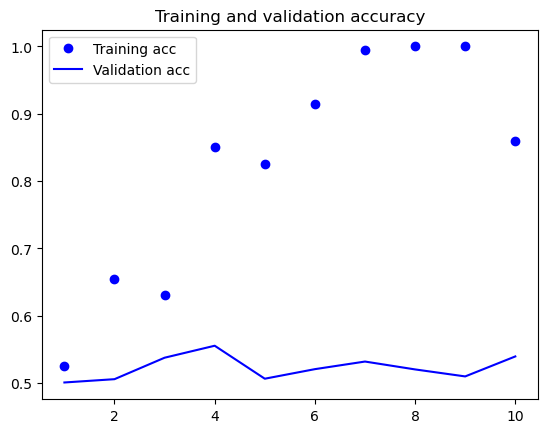

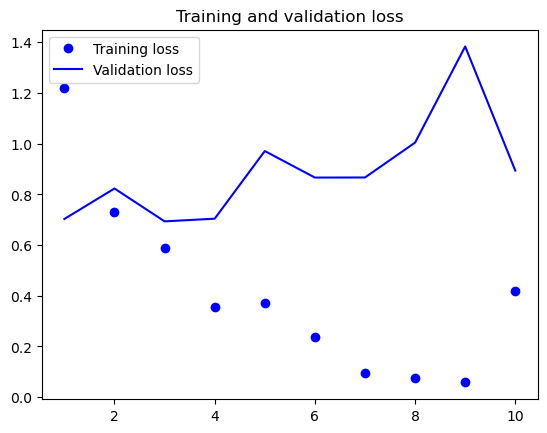

In [33]:
# Listing 6.15 Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [34]:
# Listing 6.16 Training the same model without pretrained word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 0s 46ms/step - loss: 0.6959 - acc: 0.5150 - val_loss: 0.6945 - val_acc: 0.5071
Epoch 2/10
7/7 [==============================]

In [35]:
# Listing 6.17 Tokenizing the data of the test set
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':           
            # on windows platform, 會因為編碼問題報錯，所以要加上指定編碼
            # f = open(os.path.join(dir_name, fname))
            f = open(os.path.join(dir_name, fname), encoding="utf-8")           
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)
            
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


In [36]:
# Listing 6.18 Evaluating the model on the test set
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)


782/782 [==============================] - 0s 584us/step - loss: 0.9323 - acc: 0.5046


[0.9323371052742004, 0.5045599937438965]

In [37]:
#==================================
#=== Start §6.2 理解循環神經網絡 ===
#==================================

In [38]:
# -- CAN NOT RUN --
# Listing 6.19 Pseudocode RNN
state_t = 0
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t
    

NameError: name 'input_sequence' is not defined

In [39]:
# -- CAN NOT RUN --
# Listing 6.20 More detailed pseudocode for the RNN
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
    

NameError: name 'input_sequence' is not defined

In [48]:
# Listing 6.21 Numpy implementation of a simple RNN
import numpy as np

#timesteps = 100
timesteps = 10
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,)) # 只有一個元素的tuple需加上逗號

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,)) 

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) 
#    print(output_t)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

"""
tanh fun.
優點：
1. 收斂速度比sigmod函數快
2. 輸出是0均值
缺點：
1. 函數導數輸出為0~1，多次神經網絡計算後，可能趨向於0，產生梯度消失，無法繼續更新參數
2. 幂運算複雜，訓練時間長


print(ndarray.ndim)
print(ndarray.shape)
print(ndarray.dtype)
print(ndarray.size)
"""


'\ntanh fun.\n優點：\n1. 收斂速度比sigmod函數快\n2. 輸出是0均值\n缺點：\n1. 函數導數輸出為0~1，多次神經網絡計算後，可能趨向於0，產生梯度消失，無法繼續更新參數\n2. 幂運算複雜，訓練時間長\n'

In [59]:
# TEST Listing 6.21

#print(type(successive_outputs))
#print(len(successive_outputs))
#print(successive_outputs)

#input_t = np.random.random((timesteps, input_features))
#print(input_t)

state_t1 = np.zeros((output_features,))
print(input_t.ndim)

2


In [ ]:
# For Verify
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()


In [ ]:
# Listing 6.22 Preparing the IMDB data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)


In [ ]:
# Listing 6.23 Training the model with Embedding and SimpleRNN layers
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


In [ ]:
# Listing 6.24 Plotting results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
# Listing 6.25 Pseudocode details of the LSTM architecture (1/2)
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)


In [ ]:
# Listing 6.26 Pseudocode details of the LSTM architecture (2/2)
c_t+1 = i_t * k_t + c_t * f_t


In [ ]:
# Listing 6.27 Using the LSTM layer in Keras
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


In [ ]:
#=======================================
#=== Start §6.3 循環神經網絡的高級用法 ===
#=======================================

In [3]:
# Listing 6.28 Inspecting the data of the Jena weather dataset
import os
import platform

#data_dir = '/users/fchollet/Downloads/jena_climate'
if platform.system() == "Windows" :
    data_dir = 'C:\\WORKSPACES\\Datasets\\jena_climate'
elif platform.system() == "Linux" :
    data_dir = '/home/earvin/workspaces/datasets/jena_climate'
else : # Mac path (Not finished)  
    glove_dir = '/home/earvin/workspaces/datasets/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [4]:
# Listing 6.29 Parsing the data
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
    

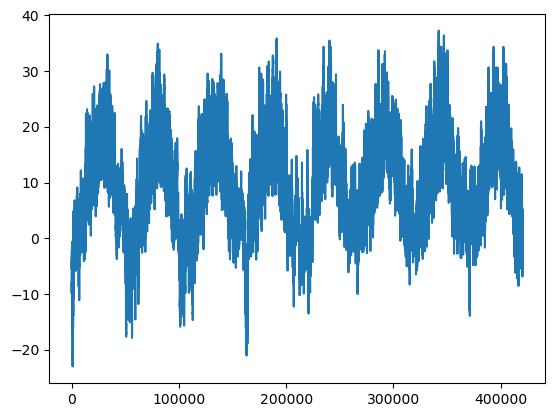

In [5]:
# Listing 6.30 Plotting the temperature timeseries
from matplotlib import pyplot as plt

temp = float_data[:, 1] ### <1> temperature (in degrees Celsius)
plt.plot(range(len(temp)), temp)


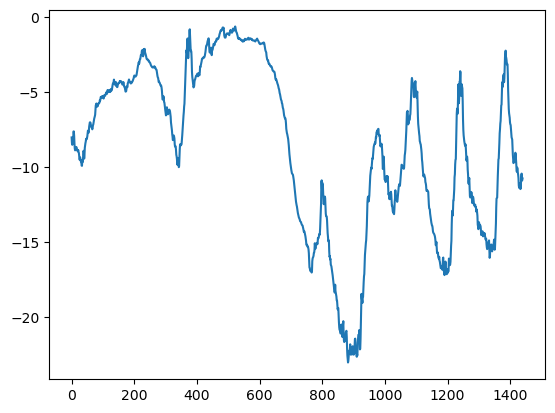

In [6]:
# Listing 6.31 Plotting the first 10 days of the temperature timeseries
plt.plot(range(1440), temp[:1440])


In [7]:
# Listing 6.32 Normalizing the data
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std


In [9]:
# Listing 6.33 Generator yielding timeseries samples and their targets
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
            
    samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
        indices = range(rows[j] - lookback, rows[j], step)
        samples[j] = data[indices]
        targets[j] = data[rows[j] + delay][1]
    yield samples, targets


In [10]:
# Listing 6.34 Preparing the training, validation, and test generators
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data, 
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback)

test_steps = (len(float_data) - 300001 - lookback)


In [ ]:
# Listing 6.35 Computing the common-sense baseline MAE
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()


In [ ]:
# Listing 6.36 Converting the MAE back to a Celsius error
celsius_mae = 0.29 * std[1]


In [ ]:
# Listing 6.37 Training and evaluating a densely connected model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)


In [ ]:
# Listing 6.38 Plotting results
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
# Listing 6.39 Training and evaluating a GRU-based model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)


In [ ]:
# Listing 6.40 Training and evaluating a dropout-regularized GRU-based model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)


In [ ]:
# Listing 6.41 Training and evaluating a dropout-regularized, stacked GRU model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)


In [ ]:
# Listing 6.42 Training and evaluating an LSTM using reversed sequences
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
# Listing 6.43 Training and evaluating a bidirectional LSTM
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=128,validation_split=0.2)


In [ ]:
# Listing 6.44 Training a bidirectional GRU
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)


In [ ]:
# Listing 6.45 Preparing the IMDB data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


In [ ]:
# Listing 6.46 Training and evaluating a simple 1D convnet on the IMDB data
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=128,validation_split=0.2)


In [ ]:
# Listing 6.47 Training and evaluating a simple 1D convnet on the Jena data
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)


In [ ]:
# Listing 6.48 Preparing higher-resolution data generators for the Jena dataset
step = 3
lookback = 720
delay = 144

train_gen = generator(float_data,lookback=lookback,delay=delay,min_index=0,max_index=200000,shuffle=True,step=step)
val_gen = generator(float_data,lookback=lookback,delay=delay,min_index=200001,max_index=300000,step=step)
test_gen = generator(float_data,lookback=lookback,delay=delay,min_index=300001,max_index=None,step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128


In [ ]:
# Listing 6.49 Model combining a 1D convolutional base and a GRU layer
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)
